In [1]:
import pandas as pd

In [9]:
notesTableDfComnpleted = pd.read_csv('notesTableDfComnpleted.csv')
notesTableDfComnpleted.shape
notesTableDfComnpleted

,patient_encounter_id,nltkCleanned,sentenceIndex,postNLTK_tokenCnt,SciSpaced,SciSpacedSentenceIdex
0,thc_10769310,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,59,753,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,1
1,thc_10769310,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,59,753,the client consented to a telephone appointmen...,2
2,thc_10769310,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,59,753,\r\nhe is not currently taking any mental heal...,3
3,thc_10769310,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,59,753,\r\nhe reports that some days he feels ok and ...,4
4,thc_10769310,INPERSON VISIT NOT AVAILABLE FOR REASON OF Cov...,59,753,\r\nhe has trouble falling and staying asleep\...,5
...,...,...,...,...,...,...
120157,thc_4331871,Hold trazodone\r\nMother to supv daily med adm...,2,315,: normal sinus rhythm\r\nReviewed [DATE_21] l...,22
120158,thc_4331871,Hold trazodone\r\nMother to supv daily med adm...,2,315,[,23
120159,thc_4331871,Hold trazodone\r\nMother to supv daily med adm...,2,315,DATE_23,24
120160,thc_4331871,Hold trazodone\r\nMother to supv daily med adm...,2,315,],25


In [7]:
notesTableDfComnpleted.columns
notesTableDfComnpleted.sentenceIndex.unique()

array([ 59,   1,   6,  14,   3,  35,   2,   7,   8,  11,  23,  32,  25,
        15,  12,  18,  44,   4,  53,  16,  47,  78,  83,  24,  20,  36,
        40,  28,  37,  10,  50,  27,   5, 125,  19,  22,  33,  30,   9,
        56,  13,  42,  17,  66,  97,  38,  52,  61,  21,  29,  69,  70,
        26, 185,  71,  31, 106,  63, 162,  34,  58,  41,  43,  68,  74,
        75,  76, 231,  95,  57,  39,  62,  49,  64,  92,  94,  82, 132,
       220,  99,  54, 161, 142, 147,  65, 129,  55,  67,  46,  51, 100,
       101, 109, 138,  48, 120, 121, 115, 111, 103, 178,  60, 136, 102,
       119,  89,  85, 166, 172, 199,  77, 183,  45, 146, 135, 181, 163,
       164, 118,  88, 137, 150,  80, 104, 148, 226, 210, 130, 152,  73,
       175, 186, 116, 134,  93, 209,  86,  90,  72, 110,  91,  84, 179,
       131,  96, 108, 174,  79, 112, 169, 140, 182,  87, 124,  98, 249,
       144, 105,  81])

In [8]:
notesTableDfExploded=pd.read_csv('notesTableDfExploded.csv')
notesTableDfExploded

,patient_encounter_id,nltkCleanned,sentenceIndex,postNLTK_tokenCnt
0,thc_6920877,"1700:\nPsychotic sx, Depressive sx, PTSD, Irri...",1,14
1,thc_6920877,7945:\nMetabolic Check; UDS to monitor sobriety.,2,5
2,thc_6920877,"10147:\nHand, Back, Neck & back Pain.",3,5
3,thc_6920877,Denies Asthma attacks.,4,2
4,thc_6920877,24876:\nContinue Zoloft 250 mg q am for depre...,5,12
...,...,...,...,...
3073370,thc_5625299,"She admits irritability, ""a little bit.""",29,5
3073371,thc_5625299,She has been compliant with medication and den...,30,11
3073372,thc_5625299,Specifically today she denies SI or HI.,31,6
3073373,thc_5625299,"She denies any ongoing use of alcohol, cannabi...",32,20


In [12]:
noteSentences = pd.merge(
    notesTableDfExploded, 
    notesTableDfComnpleted[['patient_encounter_id', 'sentenceIndex',
                            'SciSpaced', 'SciSpacedSentenceIdex'
                            ]],
    how='left',
    left_on=['patient_encounter_id', 'sentenceIndex'],
    right_on=['patient_encounter_id', 'sentenceIndex']
)

In [14]:
(~noteSentences.isna()).sum()

patient_encounter_id     3185811
nltkCleanned             3185811
sentenceIndex            3185811
postNLTK_tokenCnt        3185811
SciSpaced                 120161
SciSpacedSentenceIdex     120162
dtype: int64

In [15]:
noteSentences

,patient_encounter_id,nltkCleanned,sentenceIndex,postNLTK_tokenCnt,SciSpaced,SciSpacedSentenceIdex
0,thc_6920877,"1700:\nPsychotic sx, Depressive sx, PTSD, Irri...",1,14,NaN,NaN
1,thc_6920877,7945:\nMetabolic Check; UDS to monitor sobriety.,2,5,NaN,NaN
2,thc_6920877,"10147:\nHand, Back, Neck & back Pain.",3,5,NaN,NaN
3,thc_6920877,Denies Asthma attacks.,4,2,NaN,NaN
4,thc_6920877,24876:\nContinue Zoloft 250 mg q am for depre...,5,12,NaN,NaN
...,...,...,...,...,...,...
3185806,thc_5625299,"She admits irritability, ""a little bit.""",29,5,NaN,NaN
3185807,thc_5625299,She has been compliant with medication and den...,30,11,NaN,NaN
3185808,thc_5625299,Specifically today she denies SI or HI.,31,6,NaN,NaN
3185809,thc_5625299,"She denies any ongoing use of alcohol, cannabi...",32,20,NaN,NaN


In [19]:
noteSentences['finalSentenceBreak'] = noteSentences.SciSpaced.fillna(noteSentences.nltkCleanned)
noteSentences=noteSentences.sort_values(['patient_encounter_id',
                                         'sentenceIndex', 
                                         'SciSpacedSentenceIdex'],
                                        ascending=[True, True, True])

In [32]:
noteSentences['finalSentenceBreak_spaceRemoved']=noteSentences.finalSentenceBreak.str.replace(
    '\s{2,}', ' '
)

noteSentencesSubset = noteSentences[['patient_encounter_id', 
               'sentenceIndex', 'SciSpacedSentenceIdex', 
               'finalSentenceBreak', 'finalSentenceBreak_spaceRemoved'
               ]].copy()
noteSentencesSubset

/tmp/ipykernel_863737/4164762631.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  noteSentences['finalSentenceBreak_spaceRemoved']=noteSentences.finalSentenceBreak.str.replace(


,patient_encounter_id,sentenceIndex,SciSpacedSentenceIdex,finalSentenceBreak,finalSentenceBreak_spaceRemoved
966113,thc_0,1,NaN,1191:\n-PMH: PCOS\r\n-PSH: Denies\r\n-Allergie...,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...
966114,thc_0,2,NaN,The caller states that they have not seen thei...,The caller states that they have not seen thei...
966115,thc_0,3,NaN,The caller reports that she lives with her fam...,The caller reports that she lives with her fam...
966116,thc_0,4,NaN,The caller states that they are currently in [...,The caller states that they are currently in [...
966117,thc_0,5,NaN,The caller states that she has been feeling re...,The caller states that she has been feeling re...
...,...,...,...,...,...
2507278,thc_9999824,36,NaN,Med complaince-Reports good-his mom says he ha...,Med complaince-Reports good-his mom says he ha...
2507279,thc_9999824,37,NaN,Side effects-Deneis any .,Side effects-Deneis any .
2507280,thc_9999824,38,NaN,Susbtance abuse-Mj-uses x 'every now and again...,Susbtance abuse-Mj-uses x 'every now and again...
2507281,thc_9999824,39,NaN,Non smoker x few months.,Non smoker x few months.


In [33]:
noteSentencesSubset['finalSentenceBreak_wsCnt']=noteSentencesSubset.finalSentenceBreak.str.count(' ')
noteSentencesSubset['finalSentenceBreak_spaceRemoved_wsCnt']=noteSentencesSubset.finalSentenceBreak_spaceRemoved.str.count(' ')

<AxesSubplot:ylabel='finalSentenceBreak_wsCnt'>

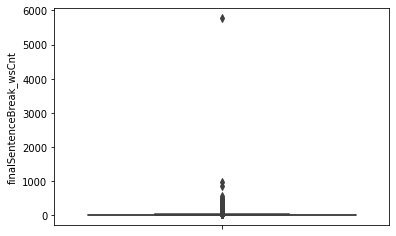

In [35]:
import seaborn as sns

sns.boxplot(data=noteSentencesSubset,
            y='finalSentenceBreak_wsCnt')

<AxesSubplot:ylabel='finalSentenceBreak_spaceRemoved_wsCnt'>

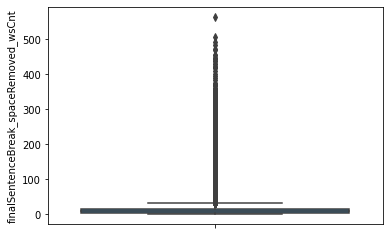

In [36]:
sns.boxplot(data=noteSentencesSubset,
            y='finalSentenceBreak_spaceRemoved_wsCnt')

In [40]:
noteSentencesSubset.loc[noteSentencesSubset.finalSentenceBreak_spaceRemoved_wsCnt>400, 'finalSentenceBreak'].iloc[-1]

'\r\n\r\nToday, [UDS; court date] case dismissed, no probation "[LOCATION_3]" mom accompanied to apt, client understands he could lose his disability, not currently presribed "side effect medication" to help him sleep, mom wants him to take meds for "up and down" mood swings, he reported "I keep away from bad people" pledges sobriety, mom identified him as Schizophrenic, then client has SUDs problems, discussed inpatient SUDs, declined services, open to seeing private psychiatrist with his benefit coverage; no SI/HI/AVH\r\n===============\r\n...EMR entries begin JUL 2019; client referred for Outpatient Competency Restoration, instant offense Harrassment (MA, on/about [DATE_8] client allegedly threatened [LOCATION_4] Police)\r\n\r\n...Per CC client reports he is sober, paranoia working with psychiatrist, OCR explained "getting along working the program" but complains "they don\'t let us have cell phones...food\'s all right" seems cognitively intact, logical; client living in CRU, gave a

In [54]:
noteSentencesSubset['sentenceFinalOrder'] = noteSentencesSubset.groupby(
    ['patient_encounter_id',]
).finalSentenceBreak_spaceRemoved.transform(lambda v: range(1, len(v)+1))

noteSentencesSubset

,patient_encounter_id,sentenceIndex,SciSpacedSentenceIdex,finalSentenceBreak,finalSentenceBreak_spaceRemoved,finalSentenceBreak_wsCnt,finalSentenceBreak_spaceRemoved_wsCnt,sentenceFinalOrder
966113,thc_0,1,NaN,1191:\n-PMH: PCOS\r\n-PSH: Denies\r\n-Allergie...,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,42,48,1
966114,thc_0,2,NaN,The caller states that they have not seen thei...,The caller states that they have not seen thei...,16,16,2
966115,thc_0,3,NaN,The caller reports that she lives with her fam...,The caller reports that she lives with her fam...,8,8,3
966116,thc_0,4,NaN,The caller states that they are currently in [...,The caller states that they are currently in [...,16,16,4
966117,thc_0,5,NaN,The caller states that she has been feeling re...,The caller states that she has been feeling re...,15,15,5
...,...,...,...,...,...,...,...,...
2507278,thc_9999824,36,NaN,Med complaince-Reports good-his mom says he ha...,Med complaince-Reports good-his mom says he ha...,17,17,36
2507279,thc_9999824,37,NaN,Side effects-Deneis any .,Side effects-Deneis any .,3,3,37
2507280,thc_9999824,38,NaN,Susbtance abuse-Mj-uses x 'every now and again...,Susbtance abuse-Mj-uses x 'every now and again...,13,12,38
2507281,thc_9999824,39,NaN,Non smoker x few months.,Non smoker x few months.,4,4,39


In [3]:
# noteSentencesSubset.to_csv(
#     'noteSentencesSubset.csv', index=False
# )

noteSentencesSubset = pd.read_csv('noteSentencesSubset.csv')
noteSentencesSubset.shape

(3185812, 8)

# obtain the header values

In [2]:
import os
from pathlib import Path
from itertools import chain

os.environ["DB_PATH"]='../../db.json'
from neuroblu_postgres.databaseIO import pgIO

In [45]:
# about 1min for 11Million rows
headerValuesDfPath = Path('headerValues.csv')

if not headerValuesDfPath.exists():
    headerValues = pgIO.getDataIterator(
        query=f'''
        SELECT 
            response.trt_plan_id, 
            response.source_id
        FROM thc.response
        ; 
        ''',
        dbName='NLP_CDM',
        chunks=10000,
    )
    alldata = chain(*headerValues)

    headerValuesDf = pd.DataFrame(
        alldata,
        columns=['trt_plan_id',
                 'source_id', 
                 ],
    )
    headerValuesDf.to_csv(
        headerValuesDfPath,
        index=False
    )
else:
    headerValuesDf = pd.read_csv(
        headerValuesDfPath,
    )

In [52]:
headerValuesDf.rename(
    dict(source_id='header'),
    axis=1, inplace=True
)

headerValuesDf['patient_encounter_id'] = headerValuesDf.trt_plan_id.apply(lambda v: 'thc_' + str(v))
headerValuesDf

,trt_plan_id,header,patient_encounter_id
0,1111796,2188,thc_1111796
1,942804,3350,thc_942804
2,942804,24876,thc_942804
3,942804,22507,thc_942804
4,942804,0,thc_942804
...,...,...,...
666096,10871829,24082,thc_10871829
666097,10871829,22269,thc_10871829
666098,10874024,10147,thc_10874024
666099,10874031,22269,thc_10874031


In [57]:
headerValuesDf.sort_values('patient_encounter_id')

,trt_plan_id,header,patient_encounter_id
494024,0,3510,thc_0
493761,0,1706,thc_0
493759,0,18752,thc_0
493758,0,18751,thc_0
499601,0,33895,thc_0
...,...,...,...
475984,9999824,10133,thc_9999824
475985,9999824,12690,thc_9999824
475981,9999824,24082,thc_9999824
475982,9999824,10147,thc_9999824


# Final merge to get the header values

In [55]:
pd.merge(noteSentencesSubset[['patient_encounter_id',
                              'finalSentenceBreak_spaceRemoved',
                              'sentenceFinalOrder',
                              ]], 
         headerValuesDf[['patient_encounter_id', 'header']],
         how='left',
         on='patient_encounter_id',
         )

,patient_encounter_id,finalSentenceBreak_spaceRemoved,sentenceFinalOrder,header
0,thc_0,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,1,1191
1,thc_0,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,1,6267
2,thc_0,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,1,39249
3,thc_0,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,1,10402
4,thc_0,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,1,2983
...,...,...,...,...
30325000,thc_9999824,22269:\nno impaiment evident at present.,40,24876
30325001,thc_9999824,22269:\nno impaiment evident at present.,40,10133
30325002,thc_9999824,22269:\nno impaiment evident at present.,40,12690
30325003,thc_9999824,22269:\nno impaiment evident at present.,40,22507


# Upload to database

In [4]:
from psycopg2.extras import execute_values

In [12]:
noteSentencesSubset.dropna(axis=0,
                           subset=['sentenceFinalOrder'],
                           inplace=True)

In [20]:
noteSentencesSubset['sentenceId']=noteSentencesSubset.patient_encounter_id + '_' + noteSentencesSubset.sentenceFinalOrder.apply(lambda v: str(int(v)))
noteSentencesSubset['database'] = 'thc'
noteSentencesSubset.finalSentenceBreak_spaceRemoved_wsCnt=noteSentencesSubset.finalSentenceBreak_spaceRemoved_wsCnt.apply(int)
noteSentencesSubset.sentenceFinalOrder=noteSentencesSubset.sentenceFinalOrder.apply(int)

noteSentencesSubset.head()

,patient_encounter_id,sentenceIndex,SciSpacedSentenceIdex,finalSentenceBreak,finalSentenceBreak_spaceRemoved,finalSentenceBreak_wsCnt,finalSentenceBreak_spaceRemoved_wsCnt,sentenceFinalOrder,sentenceId,database
0,thc_0,1,NaN,1191:\n-PMH: PCOS\r\n-PSH: Denies\r\n-Allergie...,1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKD...,42.0,48,1,thc_0_1,thc
1,thc_0,2,NaN,The caller states that they have not seen thei...,The caller states that they have not seen thei...,16.0,16,2,thc_0_2,thc
2,thc_0,3,NaN,The caller reports that she lives with her fam...,The caller reports that she lives with her fam...,8.0,8,3,thc_0_3,thc
3,thc_0,4,NaN,The caller states that they are currently in [...,The caller states that they are currently in [...,16.0,16,4,thc_0_4,thc
4,thc_0,5,NaN,The caller states that she has been feeling re...,The caller states that she has been feeling re...,15.0,15,5,thc_0_5,thc


In [21]:
    # (patient_encounter_id, 
    # sentence_id,
    # database,
    # sentence,
    # n_token,
    # sentence_pos)
    
noteSentencesSubsetList = noteSentencesSubset[['patient_encounter_id', 
                                               'sentenceId',
                                               'database',
                                               'finalSentenceBreak_spaceRemoved',
                                               'finalSentenceBreak_spaceRemoved_wsCnt',
                                               'sentenceFinalOrder',
                                               ]].values.tolist()
noteSentencesSubsetList

[['thc_0',
  'thc_0_1',
  'thc',
  '1191:\n-PMH: PCOS -PSH: Denies -Allergies: NKDA -Head trauma: Denies -Seizure: Denies 6267:\nReports remote cannabis use 2 yrs ago resulted in arrest for possession ("this was the third time I ever used so I never did it again") 39249:\nThe caller reports that they have a dx of depression and anxiety.',
  48,
  1],
 ['thc_0',
  'thc_0_2',
  'thc',
  'The caller states that they have not seen their psychiatrist in a while due to financial strain.',
  16,
  2],
 ['thc_0',
  'thc_0_3',
  'thc',
  'The caller reports that she lives with her family.',
  8,
  3],
 ['thc_0',
  'thc_0_4',
  'thc',
  'The caller states that they are currently in [LOCATION_3] and they have been there for two weeks.',
  16,
  4],
 ['thc_0',
  'thc_0_5',
  'thc',
  'The caller states that she has been feeling really depressed for a while and recently everyday.',
  15,
  5],
 ['thc_0',
  'thc_0_6',
  'thc',
  'The caller states that there has not been any triggers lately.',
  10,

In [22]:
success = pgIO.commitDataList(
    query='''
    INSERT INTO v1_nlp.sentences
    (patient_encounter_id, 
    sentence_id,
    database,
    sentence,
    n_token,
    sentence_pos)
    VALUES %s;
    ''',
    values=noteSentencesSubsetList,
    dbName='NLP_CDM',
)
success

True